In [30]:
#imports
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
#for ML stuff may use SVM stuff also
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
from statistics import stdev 

## Read in truck 1 csv and select important columns for analysis. Use pandas parameters for possible speed boost.  


In [31]:
df_T1 = pd.read_csv('C:\\Users\\willi\\Desktop\\truck1.csv', index_col = "Time", usecols = ['Time',
 '4649_Ch1_Alternator_250A',
 '4649_Ch8_APU_BatteryVoltage'] ,engine = 'c', skip_blank_lines = True)


In [32]:
df_T1.head() 

,4649_Ch1_Alternator_250A,4649_Ch8_APU_BatteryVoltage
Time,,
08/07/2019 07:54:02.959,NaN,NaN
08/07/2019 07:54:03.059,NaN,NaN
08/07/2019 07:54:03.159,NaN,NaN
08/07/2019 07:54:03.259,NaN,NaN
08/07/2019 07:54:03.359,NaN,NaN


#### convert time col to datetime and view head of file, enough to view actual values.

In [33]:
df_T1.index = pd.to_datetime(df_T1.index)
print(df_T1.index)

DatetimeIndex(['2019-08-07 07:54:02.959000', '2019-08-07 07:54:03.059000',
               '2019-08-07 07:54:03.159000', '2019-08-07 07:54:03.259000',
               '2019-08-07 07:54:03.359000', '2019-08-07 07:54:03.459000',
               '2019-08-07 07:54:03.559000', '2019-08-07 07:54:03.659000',
               '2019-08-07 07:54:03.759000', '2019-08-07 07:54:03.859000',
               ...
               '2019-08-05 15:12:52.621000', '2019-08-05 15:12:52.721000',
               '2019-08-05 15:12:52.821000', '2019-08-05 15:12:52.921000',
               '2019-08-05 15:12:53.021000', '2019-08-05 15:12:53.121000',
               '2019-08-05 15:12:53.221000', '2019-08-05 15:12:53.321000',
               '2019-08-05 15:12:53.421000', '2019-08-05 15:12:53.521000'],
              dtype='datetime64[ns]', name='Time', length=1216689, freq=None)


In [34]:
list(df_T1.head())

['4649_Ch1_Alternator_250A', '4649_Ch8_APU_BatteryVoltage']

### describe the selected data

In [35]:
df_T1.info()
df_T1.describe()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1216689 entries, 2019-08-07 07:54:02.959000 to 2019-08-05 15:12:53.521000
Data columns (total 2 columns):
4649_Ch1_Alternator_250A       1216197 non-null float64
4649_Ch8_APU_BatteryVoltage    1216197 non-null float64
dtypes: float64(2)
memory usage: 27.8 MB


,4649_Ch1_Alternator_250A,4649_Ch8_APU_BatteryVoltage
count,1.216197e+06,1.216197e+06
mean,4.143630e+01,1.386995e+01
std,3.111164e+01,2.840073e-01
min,2.274548e+00,1.214054e+01
25%,2.269303e+01,1.380865e+01
50%,2.715629e+01,1.401144e+01
75%,4.763199e+01,1.404532e+01
max,2.336585e+02,1.413001e+01


In [36]:
date3days = df_T1["2019-08-05":"2019-08-07"]



In [37]:
print("***3 day describe***\n",date3days[['4649_Ch8_APU_BatteryVoltage','4649_Ch1_Alternator_250A']].describe())
print("\n______________________________________________________________________\n")


***3 day describe***
        4649_Ch8_APU_BatteryVoltage  4649_Ch1_Alternator_250A
count                950905.000000             950905.000000
mean                     13.842501                 41.727043
std                       0.303386                 30.472934
min                      12.140536                  3.304532
25%                      13.738613                 22.874228
50%                      14.006409                 27.375639
75%                      14.041657                 49.653811
max                      14.130007                232.475967

______________________________________________________________________



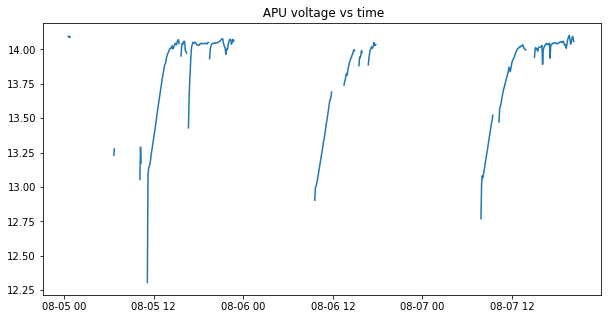

In [38]:
x1 = df_T1.dropna()
x1 = df_T1["2019-08-05":"2019-08-07":].resample("300S").mean()
x = x1.index
altAmps = x1[['4649_Ch1_Alternator_250A']]
y = x1[['4649_Ch8_APU_BatteryVoltage']]

plt.figure(figsize=(10,5))
plt.title(' APU voltage vs time')
plt.plot(x,y)



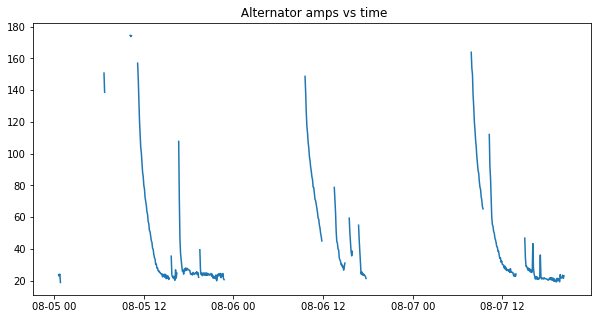

In [39]:
plt.figure(figsize=(10,5))
plt.title(' Alternator amps vs time')
ax = plt.plot(x,altAmps)


In [40]:
x1[['4649_Ch1_Alternator_250A','4649_Ch8_APU_BatteryVoltage']].describe()

,4649_Ch1_Alternator_250A,4649_Ch8_APU_BatteryVoltage
count,339.000000,339.000000
mean,43.912469,13.829520
std,33.830828,0.321042
min,18.789823,12.306884
25%,23.282386,13.712459
50%,26.745130,14.003543
75%,51.042659,14.042711
max,174.505134,14.102713


# scatter plots with regression line

Text(0.5, 1.0, 'Alternator Amps vs APU voltage')

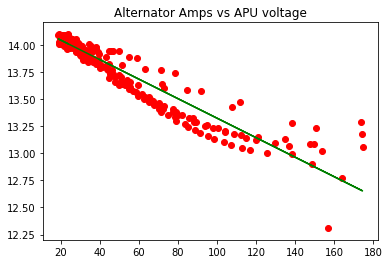

In [41]:
## plt.figure(figsize=(10,5))
x2=altAmps.dropna()
y2 = y.dropna()
linear_regressor = LinearRegression()  
linear_regressor.fit(x2, y2)  #linear reg
Y_pred = linear_regressor.predict(x2)
plt.xlabel='amps'
plt.scatter(x2,y2, color='red')
ax = plt.plot(x2,Y_pred, color='green')
plt.title('Alternator Amps vs APU voltage')

In [42]:
#logistic regression classifier
df_T1.dropna()
#create a new col to show if battery is "fully charged or not"
df_T1['APU_Voltage_Binary'] = (df_T1['4649_Ch8_APU_BatteryVoltage']>14)*1
#going to try and predict what time of day the APU unit will be "charged"
logReg = LogisticRegression()
df_T1.head(10000)

,4649_Ch1_Alternator_250A,4649_Ch8_APU_BatteryVoltage,APU_Voltage_Binary
Time,,,
2019-08-07 07:54:02.959,NaN,NaN,0
2019-08-07 07:54:03.059,NaN,NaN,0
2019-08-07 07:54:03.159,NaN,NaN,0
2019-08-07 07:54:03.259,NaN,NaN,0
2019-08-07 07:54:03.359,NaN,NaN,0
2019-08-07 07:54:03.459,NaN,NaN,0
2019-08-07 07:54:03.559,NaN,NaN,0
2019-08-07 07:54:03.659,NaN,NaN,0
2019-08-07 07:54:03.759,NaN,NaN,0
